<a href="https://colab.research.google.com/github/yongjaeahn/python_coding/blob/main/korean/source/10_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	선형 회귀 알고리즘

데이터 수집

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print(type(diabetes))
print(dir(diabetes))

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
help(load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
    Load and return the diabetes dataset (regression).
    
    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================
    
    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.
    
    Read more in the :ref:`User Guide <diabetes_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
    

데이터 전처리

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabetes.data[0:3])
print(diabetes.data[-1:-3:-1])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[[-0.04547248 -0.04464164 -0.0730303  -0.08141314  0.08374012  0.02780893
   0.17381578 -0.03949338 -0.00422151  0.00306441]
 [-0.04547248 -0.04464164  0.03906215  0.00121528  0.01631843  0.01528299
  -0.02867429  0.02655962  0.04452873 -0.02593034]]


In [ ]:
print(diabetes.target[0:3])
print(diabetes.target[-1:-4:-1])

[151.  75. 141.]
[ 57. 220. 132.]


In [ ]:
import numpy as np

def normalize(values):
  mean = np.mean(values)    # 평균
  std = np.std(values)      # 표준편차
  # 정규화 = (값 - 평균) / 표준편차
  normalized = (values - mean) / std

  return normalized

ages = np.array([50,45,20,60,63,57,40,47,30,58])
normalized_ages = normalize(ages)
print('정규화된 나이 :\n',normalized_ages)

bmis = np.array([30,28,22,28,27,32,27,22,25,29])
normalized_bmis = normalize(bmis)
print('정규화된 체질량 지수 :\n',normalized_bmis)

정규화된 나이 :
 [ 0.22834992 -0.15223328 -2.05514926  0.98951631  1.21786623  0.76116639
 -0.53281647  0.         -1.29398287  0.83728303]
정규화된 체질량 지수 :
 [ 0.97849211  0.32616404 -1.63082018  0.32616404  0.          1.63082018
  0.         -1.63082018 -0.65232807  0.65232807]


In [ ]:
sex = np.array(['M','F','F','M','M','F','F','F','M','F'])
sex_numeric = np.where(sex == 'M',1,0)
print('수치화된 성별 :',sex_numeric)
normalized_sex = normalize(sex_numeric)
print('정규화된 성별 :\n',normalized_sex)

수치화된 성별 : [1 0 0 1 1 0 0 0 1 0]
정규화된 성별 :
 [ 1.22474487 -0.81649658 -0.81649658  1.22474487  1.22474487 -0.81649658
 -0.81649658 -0.81649658  1.22474487 -0.81649658]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

features = np.array(list(zip(ages,sex_numeric,bmis)))
print('특징 :\n',features)

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

print('정규화된 특징 :\n',normalized_features)

특징 :
 [[50  1 30]
 [45  0 28]
 [20  0 22]
 [60  1 28]
 [63  1 27]
 [57  0 32]
 [40  0 27]
 [47  0 22]
 [30  1 25]
 [58  0 29]]
정규화된 특징 :
 [[ 0.22834992  1.22474487  0.97849211]
 [-0.15223328 -0.81649658  0.32616404]
 [-2.05514926 -0.81649658 -1.63082018]
 [ 0.98951631  1.22474487  0.32616404]
 [ 1.21786623  1.22474487  0.        ]
 [ 0.76116639 -0.81649658  1.63082018]
 [-0.53281647 -0.81649658  0.        ]
 [ 0.         -0.81649658 -1.63082018]
 [-1.29398287  1.22474487 -0.65232807]
 [ 0.83728303 -0.81649658  0.65232807]]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

features = np.array(list(zip(ages,sex_numeric,bmis)))
#print('특징 :\n',features)

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

print('정규화된 특징 :\n',normalized_features)

정규화된 특징 :
 [[0.69767442 1.         0.8       ]
 [0.58139535 0.         0.6       ]
 [0.         0.         0.        ]
 [0.93023256 1.         0.6       ]
 [1.         1.         0.5       ]
 [0.86046512 0.         1.        ]
 [0.46511628 0.         0.5       ]
 [0.62790698 0.         0.        ]
 [0.23255814 1.         0.3       ]
 [0.88372093 0.         0.7       ]]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

features = np.array(list(zip(ages,sex_numeric,bmis)))
#print('특징 :\n',features)

scaler = MinMaxScaler(feature_range=(-1,1))
normalized_features = scaler.fit_transform(features)

print('정규화된 특징 :\n',normalized_features)

정규화된 특징 :
 [[ 0.39534884  1.          0.6       ]
 [ 0.1627907  -1.          0.2       ]
 [-1.         -1.         -1.        ]
 [ 0.86046512  1.          0.2       ]
 [ 1.          1.          0.        ]
 [ 0.72093023 -1.          1.        ]
 [-0.06976744 -1.          0.        ]
 [ 0.25581395 -1.         -1.        ]
 [-0.53488372  1.         -0.4       ]
 [ 0.76744186 -1.          0.4       ]]


모델 훈련

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(diabetes.data,diabetes.target)
print('훈련된 회귀방정식의 계수 :\n',model.coef_)
print('훈련된 회귀방정식의 절편 :',model.intercept_)

훈련된 회귀방정식의 계수 :
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
훈련된 회귀방정식의 절편 : 152.13348416289597


모델 테스트

In [3]:
print('1년 후 당뇨병 진행의 예측을 위한 독립변수 :\n',diabetes.data[0:3])
y_pred = model.predict(diabetes.data[0:3])

y_true = diabetes.target[0:3]
print('회귀분석 모델에 사용된 1년 후 당뇨병 진행의 정량적 측정치:\n',y_true)
print('회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:\n',y_pred)

1년 후 당뇨병 진행의 예측을 위한 독립변수 :
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
회귀분석 모델에 사용된 1년 후 당뇨병 진행의 정량적 측정치:
 [151.  75. 141.]
회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:
 [206.11667725  68.07103297 176.88279035]


In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# 데이터 수집 및 전처리
diabetes = load_diabetes()

# 모델 훈련
model = LinearRegression()
model.fit(diabetes.data,diabetes.target)

# 모델 테스트
y_pred = model.predict(diabetes.data[0:3])
print('회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:\n', y_pred)

회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:
 [206.11667725  68.07103297 176.88279035]


In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# 데이터 수집 및 전처리
diabetes = load_diabetes(as_frame=True)

# 모델 훈련
model = LinearRegression()
model.fit(diabetes.data,diabetes.target)

# 모델 테스트
y_pred = model.predict(diabetes.data[0:3])
print('회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:\n', y_pred)

회귀분석 모델로 예측한 1년 후 당뇨병 진행의 정량적 측정치:
 [206.11667725  68.07103297 176.88279035]


In [ ]:
print(diabetes.data)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
print(diabetes.target)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


모델 평가

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.25, random_state=42)

In [7]:
print('전체 데이터의 갯수 :',len(diabetes.data))
print('학습 데이터의 갯수 :',len(data_train))
print('테스트 데이터의 갯수 :',len(data_test))
print('테스트 데이터의 비율 :',len(target_test) / len(diabetes.data))

전체 데이터의 갯수 : 442
학습 데이터의 갯수 : 331
테스트 데이터의 갯수 : 111
테스트 데이터의 비율 : 0.251131221719457


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_true = diabetes.target[0:3]
mse = mean_squared_error(y_true,y_pred)
r_square = r2_score(y_true,y_pred)
print('평균제곱오차 :',mse)
print('R 스퀘어 :',r_square)

평균제곱오차 : 1457.8111126596916
R 스퀘어 : -0.28228108033006505


In [16]:
import numpy as np

rmse = np.sqrt(mse)
print('평균제곱근오차(np.sqrt)\t\t\t:',rmse)

rmse = mean_squared_error(y_true,y_pred,squared=False)
print('평균제곱근오차(mean_squared_error)\t:',rmse)

평균제곱근오차(np.sqrt)			: 38.18129270545579
평균제곱근오차(mean_squared_error)	: 38.18129270545579


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 수집 및 전처리
diabetes = load_diabetes(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.25, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
mse = mean_squared_error(target_test,y_pred)
r_square =      r2_score(target_test,y_pred)
print('평균제곱오차 :',mse)
print('R 스퀘어 :',r_square)

평균제곱오차 : 2848.3106508475057
R 스퀘어 : 0.4849058889476755


	로지스틱 회귀 알고리즘

데이터 수집 및 전처리

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=42)

In [ ]:
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(iris.target)
print(iris.target[50:56])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
50    1
51    1
52    1
53    1
54    1
55    1
Name: target, dtype: int64


In [ ]:
print(dir(iris))
print(iris.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


모델 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_train,target_train)
print('훈련된 회귀방정식의 계수 :',model.coef_)

훈련된 회귀방정식의 계수 : [[-0.38930504  0.92000554 -2.33122213 -0.98310984]
 [ 0.49929128 -0.30959282 -0.21517453 -0.73385023]
 [-0.10998624 -0.61041272  2.54639666  1.71696008]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(data_train,target_train)
print('훈련된 회귀방정식의 계수 :\n',model.coef_)

훈련된 회귀방정식의 계수 :
 [[-0.38927515  0.91983274 -2.33150421 -0.98321821]
 [ 0.49940308 -0.30884354 -0.21478362 -0.73419233]
 [-0.11012793 -0.6109892   2.54628783  1.71741054]]


모델 테스트

In [ ]:
y_pred = model.predict(data_test)
print('회귀분석 모델로 예측한 붓꽃의 종류:\n', y_pred)

회귀분석 모델로 예측한 붓꽃의 종류:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0]


모델 평가

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=42)

# 모델 훈련
model = LogisticRegression(max_iter=1000)
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 1.0


	K-최근접 이웃 분류 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 0.9666666666666667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 0.9666666666666667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

# 모델 훈련
k = 100
model = KNeighborsClassifier(n_neighbors=k)
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 0.5666666666666667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)

k = 3
target_accuracy = 0.99

while True:
# 모델 훈련
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(data_train,target_train)

# 모델 테스트
  y_pred = model.predict(data_test)

# 모델 평가
  accuracy = accuracy_score(target_test, y_pred)
  print('K:',k,', 정확도:', accuracy)

  if accuracy > target_accuracy: break

  k = k + 1

K: 3 , 정확도: 0.9666666666666667
K: 4 , 정확도: 1.0


	결정트리 분류 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 수집 및 전처리
iris = load_iris(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=42)

# 모델 훈련
model = DecisionTreeClassifier()
model.fit(data_train,target_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
accuracy = accuracy_score(target_test, y_pred)
print('정확도:', accuracy)

정확도: 1.0


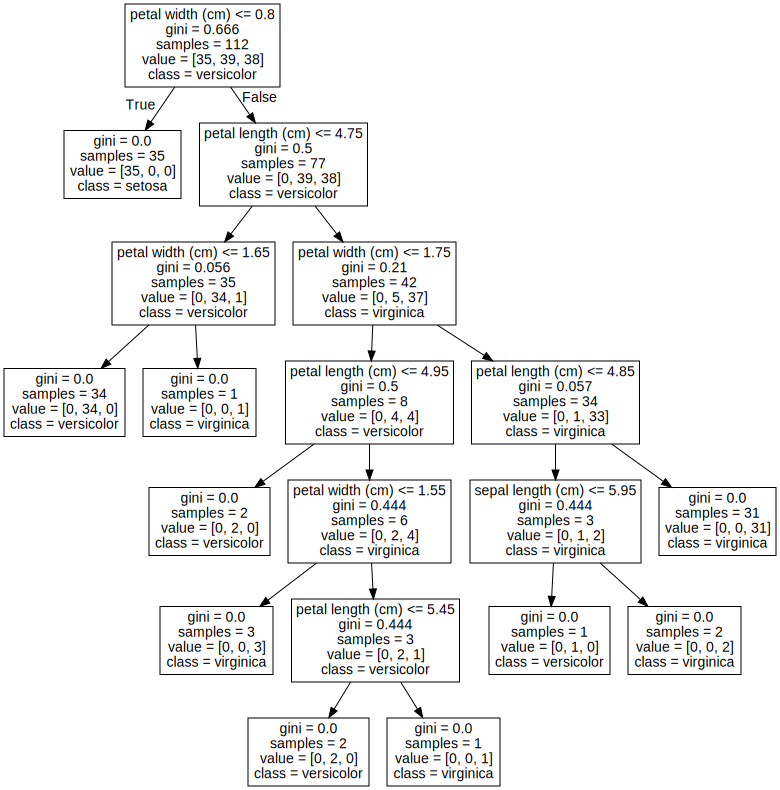

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                out_file='decision tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names)

with open('decision tree.dot') as viz:
  decision_tree = viz.read()

graphviz.Source(decision_tree)

	K-평균 군집분석(K-Means Clustering) 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 수집 및 전처리
iris = load_iris()
data_train, data_test, target_train, target_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# 모델 훈련
model = KMeans(n_clusters=3,n_init=10,random_state=42)
model.fit(data_train)

# 모델 테스트
y_pred = model.predict(data_test)

# 모델 평가
print('실데이터로 알려진 분류:\n',target_test)
print('모델로 예측된 분류:\n',y_pred)
score = silhouette_score(data_test, y_pred)
print('Silhouette Score:',score)

실데이터로 알려진 분류:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
모델로 예측된 분류:
 [2 0 1 2 2 0 2 1 2 2 1 0 0 0 0 2 1 2 2 1 0 2 0 1 1 1 1 1 0 0]
Silhouette Score: 0.5749429418885253


In [ ]:
print(model.cluster_centers_)

[[4.99       3.4525     1.45       0.245     ]
 [6.85517241 3.10344828 5.70689655 2.02068966]
 [5.85686275 2.73137255 4.38627451 1.44313725]]


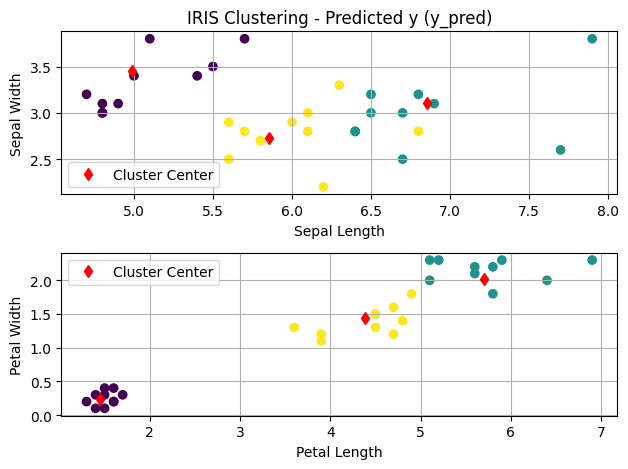

In [ ]:
import matplotlib.pyplot as plt

sepal_length = data_test[:,0]
sepal_width = data_test[:,1]
petal_length = data_test[:,2]
petal_width = data_test[:,3]

sepal_length_cluster_center = model.cluster_centers_[:,0]
sepal_width_cluster_center = model.cluster_centers_[:,1]
petal_length_cluster_center = model.cluster_centers_[:,2]
petal_width_cluster_center = model.cluster_centers_[:,3]

plt.subplot(2,1,1)
plt.scatter(sepal_length,sepal_width,c=y_pred)
plt.title('IRIS Clustering - Predicted y (y_pred)')
plt.plot(sepal_length_cluster_center,sepal_width_cluster_center,
         'rd',label='Cluster Center')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

plt.subplot(2,1,2)
plt.scatter(petal_length,petal_width,c=y_pred)
plt.plot(petal_length_cluster_center,petal_width_cluster_center,
         'rd',label='Cluster Center')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()

plt.tight_layout()
plt.show()

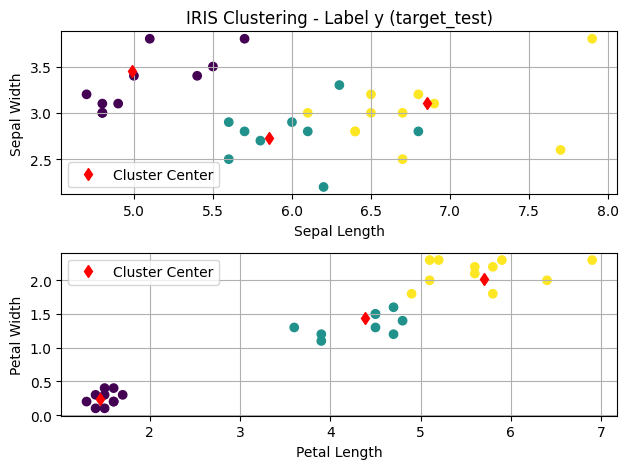

In [ ]:
import matplotlib.pyplot as plt

sepal_length = data_test[:,0]
sepal_width = data_test[:,1]
petal_length = data_test[:,2]
petal_width = data_test[:,3]

sepal_length_cluster_center = model.cluster_centers_[:,0]
sepal_width_cluster_center = model.cluster_centers_[:,1]
petal_length_cluster_center = model.cluster_centers_[:,2]
petal_width_cluster_center = model.cluster_centers_[:,3]

plt.subplot(2,1,1)
plt.scatter(sepal_length,sepal_width,c=target_test)
plt.title('IRIS Clustering - Label y (target_test)')
plt.plot(sepal_length_cluster_center,sepal_width_cluster_center,
         'rd',label='Cluster Center')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

plt.subplot(2,1,2)
plt.scatter(petal_length,petal_width,c=target_test)
plt.plot(petal_length_cluster_center,petal_width_cluster_center,
         'rd',label='Cluster Center')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()

plt.tight_layout()
plt.show()